In [1]:
"""
#################################
 Classification after training the Model, modules and methods in this file evaluate the performance of the trained
 model over the test dataset
 Test Data: Item (8) on https://ieee-dataport.org/open-access/flame-dataset-aerial-imagery-pile-burn-detection-using-drones-uavs 
 Tensorflow Version: 2.3.0
 GPU: Nvidia RTX 2080 Ti
 OS: Ubuntu 18.04
################################
"""
#########################################################
# import libraries

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

from plotdata import plot_confusion_matrix
from config import Config_classification
from config import new_size

batch_size = Config_classification.get('batch_size')
image_size = (new_size.get('width'), new_size.get('height'))
epochs = Config_classification.get('Epochs')

In [8]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "frames/Test", seed=1337, image_size=image_size, batch_size=batch_size, shuffle=True
    )

model_fire = load_model('Output/Models/model_fire_resnet_weighted_40_no_metric_simple')

_ = model_fire.evaluate(test_ds, batch_size=batch_size)

best_model_fire = load_model('Output/Models/h5model/keras/save_at_36_1.h5')
results_eval = best_model_fire.evaluate(test_ds, batch_size=batch_size)

for name, value in zip(model_fire.metrics_names, results_eval):
     print(name, ': ', value)
print()



Found 8617 files belonging to 2 classes.
270/270 [==============================] - 9s 30ms/step - loss: 1.0434 - tp: 1718.0000 - fp: 897.0000 - tn: 4240.0000 - fn: 1762.0000 - bin_accuracy: 0.6914 - precision: 0.6570 - recall: 0.4937 - auc: 0.7859
loss :  1.0433512926101685
tp :  1718.0
fp :  897.0
tn :  4240.0
fn :  1762.0
bin_accuracy :  0.6914239525794983
precision :  0.656978964805603
recall :  0.49367815256118774
auc :  0.7859232425689697



In [9]:
(1718.0)/(862+1718.0)##recall should be high 

0.665891472868217

In [10]:
(1718)/(1718+1792) ##precision should be low 

0.4894586894586895

In [29]:
run.log('loss_best_model',results_eval[0])
run.log('accuracy_best_model',results_eval[1])
run.log('loss_base_model',_[0])
run.log('accuracy_base_model',_[1])

1.136291742324829

In [ ]:
cm = np.array([[results_eval[1], results_eval[4]], [results_eval[2], results_eval[3]]])
cm_plot_labels = ['Fire', 'No Fire']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

model_file = 'Output/Models/h5model/Keras_not_weighted_40_no_metric_simple/save_at_%d.h5' % 37
model_fire = load_model(model_file)
test_fire_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "frames/confusion_test/Fire_test", seed=1337, image_size=image_size, batch_size=batch_size, shuffle=True)
test_no_fire_ds = tf.keras.preprocessing.image_dataset_from_directory(
        "frames/confusion_test/No_Fire_test", seed=1337, image_size=image_size, batch_size=batch_size, shuffle=True)
fire_eval = model_fire.evaluate(test_fire_ds)
no_fire_eval = model_fire.evaluate(test_no_fire_ds)
true_fire = len(tf.io.gfile.listdir("frames/confusion_test/Fire_test/Fire"))
true_no_fire = len(tf.io.gfile.listdir("frames/confusion_test/No_Fire_test/No_Fire"))
tp = fire_eval[1] * true_fire
fp = (1 - fire_eval[1]) * true_fire
tn = (1 - no_fire_eval[1]) * true_no_fire
fn = no_fire_eval[1] * true_no_fire
cm = np.array([[tp, fn], [fp, tn]], dtype=int)
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [14]:
#########################################################
# Import libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model

from plotdata import plot_confusion_matrix
from config import Config_classification
from config import new_size

# Configurations
batch_size = Config_classification.get('batch_size')
image_size = (new_size.get('width'), new_size.get('height'))
epochs = 3

# Load the test dataset
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "frames/Test", seed=1337, image_size=image_size, batch_size=batch_size, shuffle=True
)

# Load your saved model (final_model.keras)
model_fire = load_model('final_model.keras')

# Evaluate the model on the test dataset
_ = model_fire.evaluate(test_ds, batch_size=batch_size)

# Optionally, evaluate another model if you have multiple models saved
# Uncomment if you wish to evaluate a different saved model
# best_model_fire = load_model('Output/Models/h5model/keras/save_at_27.h5')
# results_eval = best_model_fire.evaluate(test_ds, batch_size=batch_size)

# Display evaluation metrics
results_eval = model_fire.evaluate(test_ds, batch_size=batch_size)
for name, value in zip(model_fire.metrics_names, results_eval):
    print(name, ': ', value)




Found 8617 files belonging to 2 classes.
270/270 ━━━━━━━━━━━━━━━━━━━━ 53s 194ms/step - accuracy: 0.6074 - loss: 1.8881
270/270 ━━━━━━━━━━━━━━━━━━━━ 52s 194ms/step - accuracy: 0.6047 - loss: 1.8999
loss :  1.9286290407180786
compile_metrics :  0.6061274409294128


In [1]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  0


270/270 ━━━━━━━━━━━━━━━━━━━━ 89s 329ms/step


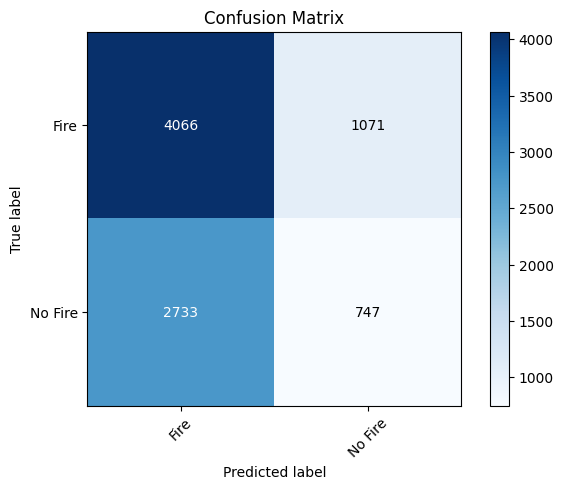

In [12]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Assuming cm_plot_labels are ['Fire', 'No Fire']

# Get the true labels from the test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)

# Get predictions from the model
y_pred = model_fire.predict(test_ds)
y_pred_labels = np.where(y_pred > 0.5, 1, 0)  # Convert probabilities to binary labels

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred_labels)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], fmt),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot the confusion matrix
cm_plot_labels = ['Fire', 'No Fire']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
plt.show()
